# Exploratory Data Analysis for the NYC AirBNB Project

## Contents

    * A
    - B 
    - c

In [5]:
%env "WANDB_NOTEBOOK_NAME" "EDA"

env: "WANDB_NOTEBOOK_NAME"="EDA"


In [7]:
import os 
import wandb
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
# os.environ["WANDB_PROJECT"] = "EDA"

ModuleNotFoundError: No module named 'pandas_profiling'

In [3]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kbardool (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.10 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


## Profile the dataset using Pandas Profiling

In [4]:
profile= pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

wandb: Network error (ReadTimeout), entering retry loop.
wandb: Network error resolved after 0:00:40.844376, resuming normal operation.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

## Analysis and Findings

- Profiling shows that last_reviews and reviews_per_month contains missing values



- `neighbourhood_group` values are imbalanced , with two neigbourhoods (Manhattan and Brooklyn) consisting of more than %85 of the total data rows, Bronx and Staten Island covering less than %3 of the data.  While this is a string/text field, the low cardinality makes this an obvious candidate for conversion to categorical / one hot field. 



- `neighbourhood` is a string / text field and has a high cardinality level. This field is a likely candidate for NLP pre-proc0essing



- `last_review` and `reviews_per_month` have missing values (%21 of values are missing)

- There is a one-to-one correspondence between missing values of `last_review` and `reviews_per_month`



- `price` Is the target field of our proposed model. The price values distribution has very high skewness (> 18). A number of high value outliers contribute to this skewedness. It might be a good idea to investigate these outliers to see if the values are indeed accurate. Indeed, the project documentation states to only consider prices between $10 and $350.

    It also has high kertosis, which makes sense as the majority of prices will be in a certain range . The 95 percentile is $350.
    


- Likewise, `minimum_nights` is highly skewed. Minimum night values of  400, 480, 999, and 1250 do seem invalid values.
 
  It seems logical to remove these data points


- `id`, `host_id`, and `host_name`are fields that can be dropped as they should not impact the property price


### Check for duplicate rows

We find the dataset does not contain duplicate rows

In [5]:
df.duplicated().sum()

0

### Price Distribution Histogram

 Number of datapoints with price > $350: 994


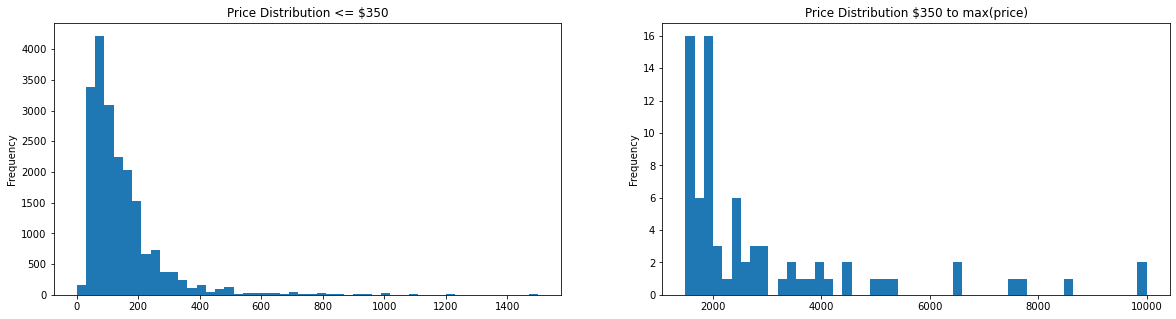

In [57]:
fig = plt.figure(figsize=(20,5)) 
# fig.subplots(1,2)
ax = plt.subplot(1,2,1)
df['price'].plot.hist(title = "Price Distribution <= $350", bins=50, range=(0, 1500), ax = ax);
ax = plt.subplot(1,2,2)
df['price'].plot.hist(title = "Price Distribution $350 to max(price)", bins=50, range=(1500, max(df['price'])), ax =ax);

print(f" Number of datapoints with price > $350: {(df['price'] > 350).sum()}")


In [58]:
high_price = df[df['price'] > 4000]
high_price

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
328,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365
1336,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364
4459,30035166,4-Floor Unique Event Space 50P Cap. - #10299B,172611460,Rasmus,Manhattan,Harlem,40.82511,-73.94961,Entire home/apt,5000,1,2,2019-02-23,0.38,2,150
5218,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0
5764,35345358,Northside Williamsburg Stunner,956324,Alex,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home/apt,4500,30,0,NaN,NaN,1,365
7679,33171891,30 days minimum Time square West Midtown apart...,177396569,Yanina,Manhattan,Hell's Kitchen,40.76043,-73.99132,Entire home/apt,4100,30,0,NaN,NaN,3,180
8388,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
8568,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
10024,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
12579,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0


### Minimum Nights Histogram

 Number of datapoints with minimum nights < 365: 19980
 Number of datapoints with minimum nights = 365: 14
 Number of datapoints with minimum nights > 365: 6


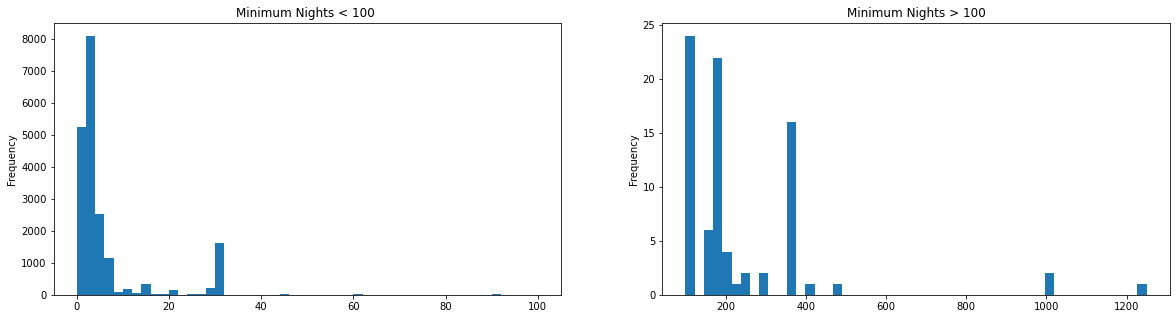

In [62]:
fig = plt.figure(figsize=(20,5)) 
# fig.subplots(1,2)
ax = plt.subplot(1,2,1)
df['minimum_nights'].plot.hist(title = "Minimum Nights < 100 ", bins=50, range=(0, 100), ax = ax);
ax = plt.subplot(1,2,2)
df['minimum_nights'].plot.hist(title = "Minimum Nights > 100", bins=50, range=(100, max(df['minimum_nights'])), ax =ax);

print(f" Number of datapoints with minimum nights < 365: {(df['minimum_nights'] < 365).sum()}")
print(f" Number of datapoints with minimum nights = 365: {(df['minimum_nights'] == 365).sum()}")
print(f" Number of datapoints with minimum nights > 365: {(df['minimum_nights'] > 365).sum()}")


In [63]:
unusual_min_nights = df[df['minimum_nights'] > 365]
unusual_min_nights

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
733,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
3000,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,NaN,NaN,1,365
8981,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365
12174,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
13116,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
17920,27362309,Not available,14621589,Sol,Brooklyn,Bedford-Stuyvesant,40.69974,-73.94658,Private room,50,400,0,NaN,NaN,1,90


###  Remove Price Outliers from raw dataset

In [21]:
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
print(idx)
print(df['price'].between(min_price, max_price).sum())
# print((df['price'].between(min_price, max_price) != True).count())

0        True
1        True
2        True
3        True
4        True
         ... 
19995    True
19996    True
19997    True
19998    True
19999    True
Name: price, Length: 20000, dtype: bool
19001


AttributeError: 'Series' object has no attribute 'columns'

In [7]:
## 
df1 = df[idx].copy()

df1.shape

(19001, 16)

In [32]:
if (df1['price'].between(min_price, max_price).all() == True):
    print('all is good', df[df['price'].between(min_price, max_price)].shape, df['price'].between(min_price, max_price).all())
    print('all is good', df1[df1['price'].between(min_price, max_price)].shape, df1['price'].between(min_price, max_price).all())
else:
    print('all is not good')

all is good (19001, 16) False
all is good (19001, 16) True


### Convert `last_review` from string to datetime 

In [70]:
df2 = df1.copy()

In [71]:
df2['last_review'] = pd.to_datetime(df['last_review'])

In [72]:
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


We notice the there is a one to one match between rows that have last_review and reviews_per_month

In [88]:
print("Rows with last_review NaT       : ",pd.isna(df2['last_review']).sum())
print("Rows with reviews_per_month NaN : ",pd.isna(df2['reviews_per_month']).sum())

count_apply = df2.apply(lambda x: True if pd.isna(x['last_review']) and pd.isna(x['reviews_per_month']) else False, axis =1)
print("Rows with both last_review AND reviews_per_month NaN : ", count_apply.sum())

Rows with last_review NaT       :  3758
Rows with reviews_per_month NaN :  3758
Rows with both last_review AND reviews_per_month NaN :  3758


We note that `name` , `host_name`, `last_reviews` and `reviews_per_month` contain null values. We will impute values for these in the inference pipeline

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

### Finish WandB run

In [94]:
run.finish()
